<a href="https://colab.research.google.com/github/niruthikka24/Customer-Churn-Dashboard/blob/master/Data_Preprocessing_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib import pyplot

from scipy import stats
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [ ]:
uploaded = files.upload()

Saving Test_Dataset.csv to Test_Dataset.csv
Saving Train_Dataset.csv to Train_Dataset.csv


In [ ]:
df = pd.read_csv('Train_Dataset.csv')
df.head()

,customer_id,account_length,location_code,intertiol_plan,voice_mail_plan,number_vm_messages,total_day_min,total_day_calls,total_day_charge,total_eve_min,...,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,Churn,Unnamed: 20
0,1001,15.0,452,no,no,0.0,121.1,130.0,20.59,216.0,...,18.36,235.1,33.0,10.58,16.1,5.0,4.35,2.0,No,NaN
1,1002,105.0,452,no,no,0.0,259.3,96.0,44.08,175.2,...,14.89,222.4,36.0,10.01,12.0,5.0,3.24,3.0,No,NaN
2,1003,97.0,452,no,yes,32.0,183.4,94.0,31.18,269.1,...,22.87,203.5,38.0,9.16,6.7,4.0,1.81,5.0,No,NaN
3,1004,121.0,445,no,yes,35.0,68.7,95.0,11.68,209.2,...,17.78,197.4,42.0,8.88,11.4,4.0,3.08,1.0,No,NaN
4,1005,98.0,452,no,yes,22.0,278.3,89.0,47.31,93.4,...,7.94,107.6,42.0,4.84,9.7,5.0,2.62,0.0,No,NaN


In [ ]:
df.drop(['Unnamed: 20'],axis=1,inplace=True)
df.head()

,customer_id,account_length,location_code,intertiol_plan,voice_mail_plan,number_vm_messages,total_day_min,total_day_calls,total_day_charge,total_eve_min,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,Churn
0,1001,15.0,452,no,no,0.0,121.1,130.0,20.59,216.0,86.0,18.36,235.1,33.0,10.58,16.1,5.0,4.35,2.0,No
1,1002,105.0,452,no,no,0.0,259.3,96.0,44.08,175.2,97.0,14.89,222.4,36.0,10.01,12.0,5.0,3.24,3.0,No
2,1003,97.0,452,no,yes,32.0,183.4,94.0,31.18,269.1,120.0,22.87,203.5,38.0,9.16,6.7,4.0,1.81,5.0,No
3,1004,121.0,445,no,yes,35.0,68.7,95.0,11.68,209.2,69.0,17.78,197.4,42.0,8.88,11.4,4.0,3.08,1.0,No
4,1005,98.0,452,no,yes,22.0,278.3,89.0,47.31,93.4,143.0,7.94,107.6,42.0,4.84,9.7,5.0,2.62,0.0,No


In [ ]:
print(df.shape)
df = df.drop_duplicates()
print(df.shape)

(2321, 20)
(2321, 20)


In [ ]:
df.drop_duplicates(subset=df.columns.difference(['customer_id']),inplace=True)
print(df.shape)

(2317, 20)


In [ ]:
df.isna().sum()

customer_id               0
account_length            2
location_code             0
intertiol_plan            3
voice_mail_plan           6
number_vm_messages        3
total_day_min             1
total_day_calls           3
total_day_charge          5
total_eve_min             3
total_eve_calls           4
total_eve_charge          8
total_night_minutes       2
total_night_calls         5
total_night_charge        5
total_intl_minutes        2
total_intl_calls          3
total_intl_charge         5
customer_service_calls    1
Churn                     5
dtype: int64

In [ ]:
df.describe()

,customer_id,account_length,location_code,number_vm_messages,total_day_min,total_day_calls,total_day_charge,total_eve_min,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls
count,2317.000000,2315.000000,2317.000000,2314.000000,2316.000000,2314.000000,2312.000000,2314.000000,2313.000000,2309.000000,2315.000000,2312.000000,2312.000000,2315.000000,2314.000000,2312.000000,2316.000000
mean,2160.595166,101.380562,473.470004,7.570441,182.729447,105.346154,30.963283,203.560156,100.131863,17.126951,209.487084,87.634948,9.434183,10.251317,4.439931,2.774338,1.652418
std,670.138937,39.990371,42.011447,14.258848,73.379103,221.289039,9.835114,115.611156,20.537867,4.323342,408.413346,12.742429,18.671979,2.795021,2.461476,0.733359,1.429283
min,1001.000000,1.000000,445.000000,-202.000000,-179.900000,-1.000000,-25.600000,-103.300000,-80.000000,0.000000,23.200000,33.000000,1.040000,-9.300000,0.000000,0.000000,0.000000
25%,1580.000000,74.000000,445.000000,0.000000,144.000000,87.000000,24.480000,166.050000,87.000000,14.180000,167.250000,79.000000,7.530000,8.600000,3.000000,2.320000,1.000000
50%,2161.000000,101.000000,452.000000,0.000000,180.350000,102.000000,30.600000,202.450000,101.000000,17.220000,201.100000,90.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,2741.000000,127.000000,452.000000,14.000000,221.000000,115.000000,37.592500,236.400000,114.000000,20.090000,235.000000,98.000000,10.580000,12.000000,6.000000,3.240000,2.000000
max,3321.000000,232.000000,547.000000,51.000000,2283.900000,10700.000000,60.960000,5186.400000,170.000000,30.830000,19700.000000,105.000000,900.150000,18.300000,20.000000,4.940000,9.000000


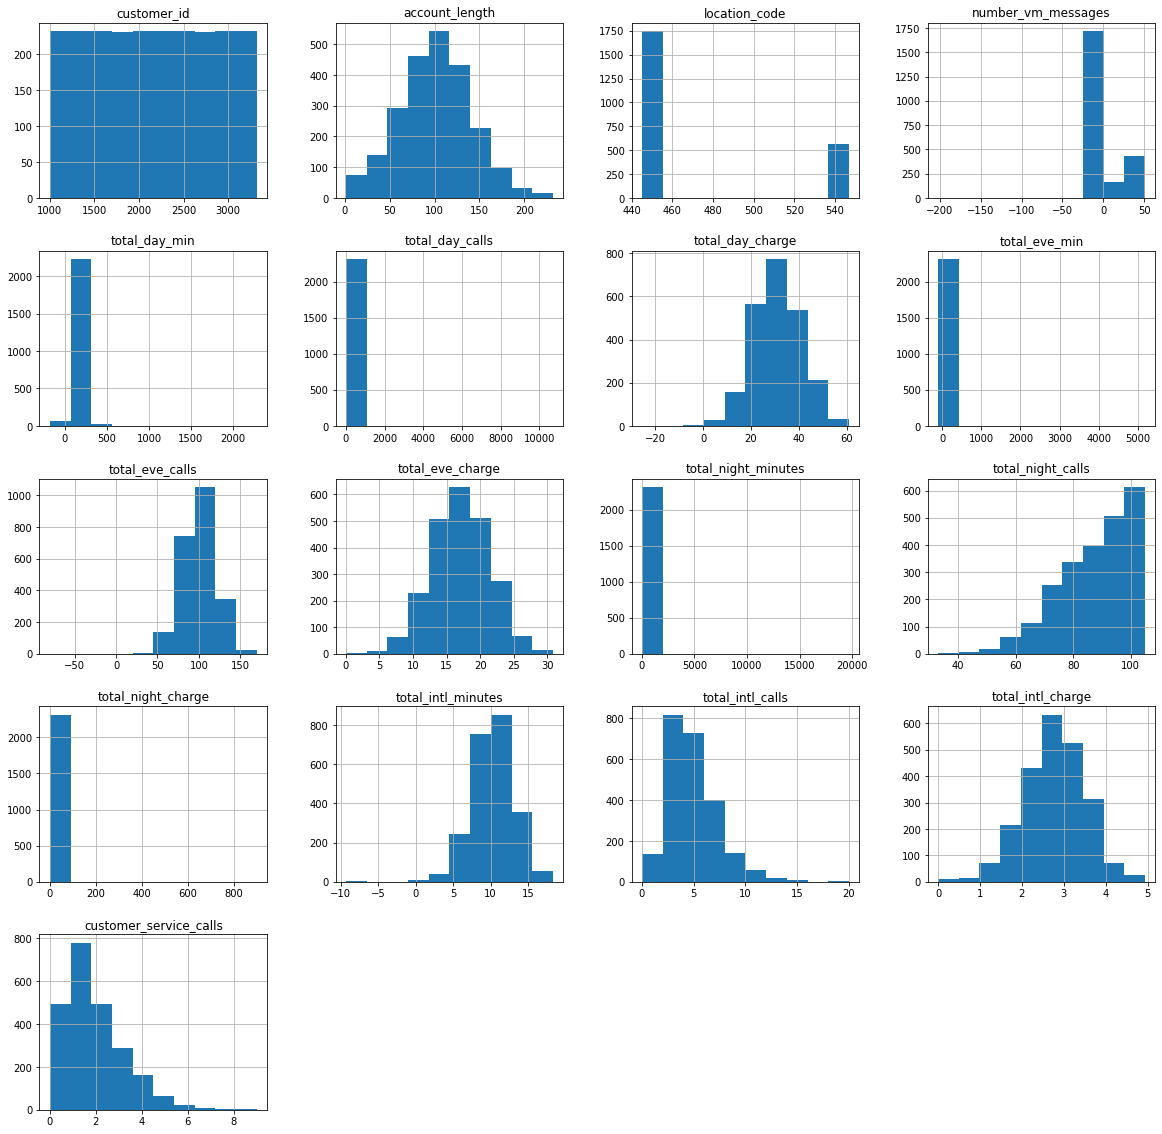

In [ ]:
p = df.hist(figsize = (20,20))

In [ ]:
dfdaycall = df[['total_day_charge','total_day_min']]
dfdaycall.head()

,total_day_charge,total_day_min
0,20.59,121.1
1,44.08,259.3
2,31.18,183.4
3,11.68,68.7
4,47.31,278.3


In [ ]:
dfdaycall['day_call_min_charge'] = dfdaycall['total_day_charge']/dfdaycall['total_day_min']
dfdaycall.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,total_day_charge,total_day_min,day_call_min_charge
0,20.59,121.1,0.170025
1,44.08,259.3,0.169996
2,31.18,183.4,0.170011
3,11.68,68.7,0.170015
4,47.31,278.3,0.169996


In [ ]:
dfdaycall.describe()

,total_day_charge,total_day_min,day_call_min_charge
count,2312.000000,2316.000000,2309.000000
mean,30.963283,182.729447,0.169579
std,9.835114,73.379103,0.013755
min,-25.600000,-179.900000,-0.170018
25%,24.480000,144.000000,0.169987
50%,30.600000,180.350000,0.170000
75%,37.592500,221.000000,0.170019
max,60.960000,2283.900000,0.223217


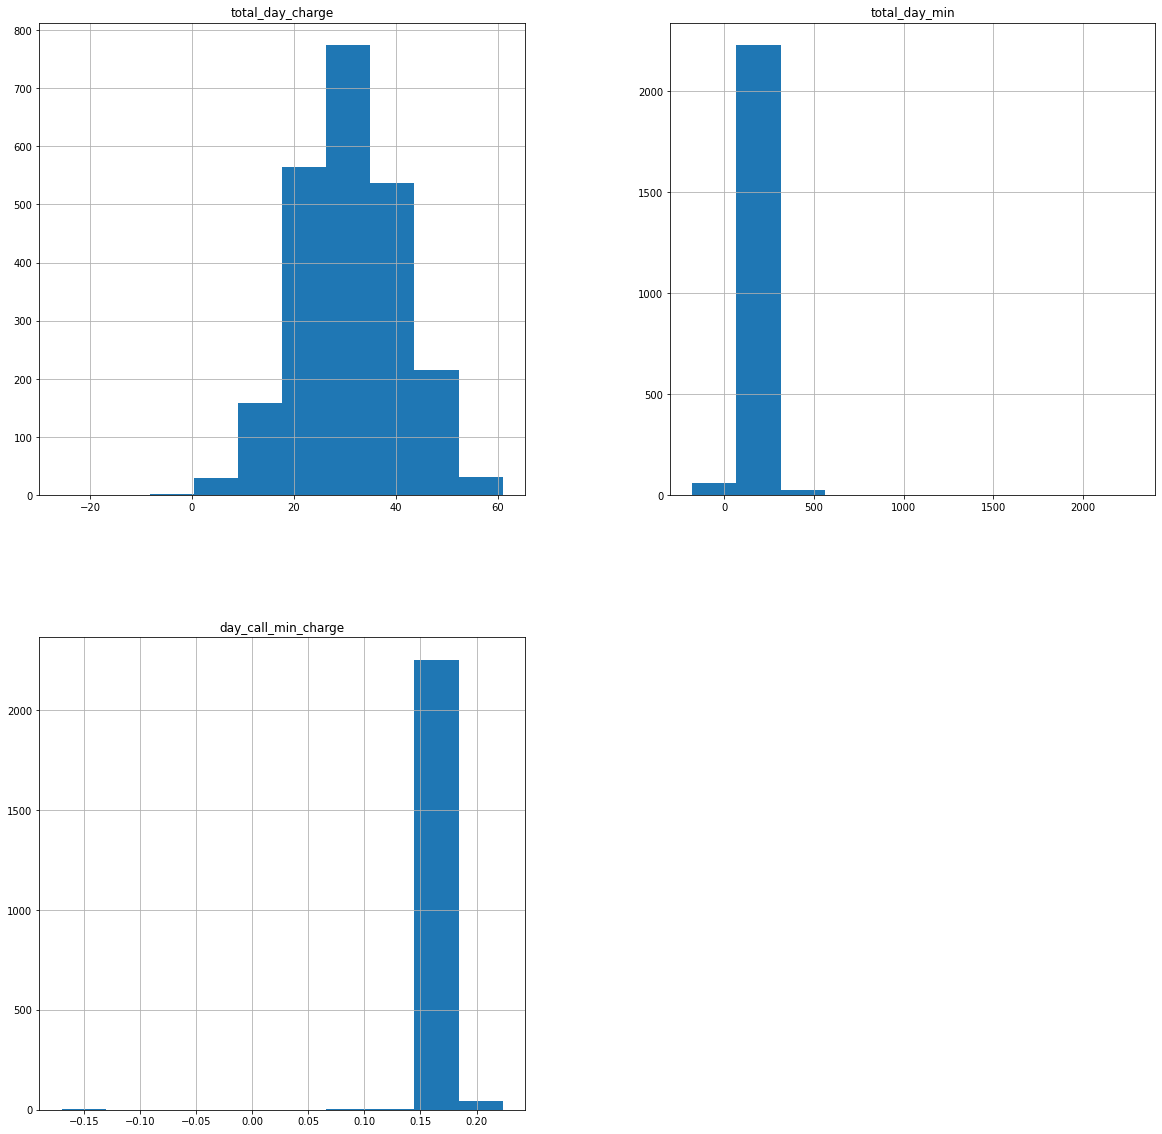

In [ ]:
p = dfdaycall.hist(figsize = (20,20))

In [ ]:
def statval(df,col):
  print("Mean: ", df[col].mean())
  print("Median: ", df[col].median())
  print("Mode: ", df[col].mode())
  print("Min: ",df[col].min())
  print("Max: ",df[col].max())

In [ ]:
statval(dfdaycall,'day_call_min_charge')

Mean:  0.1695785697443977
Median:  0.17
Mode:  0    0.17
dtype: float64
Min:  -0.17001753360607832
Max:  0.22321724709784413


In [ ]:
dfevecall = df[['total_eve_min','total_eve_charge']]
dfevecall.head()

,total_eve_min,total_eve_charge
0,216.0,18.36
1,175.2,14.89
2,269.1,22.87
3,209.2,17.78
4,93.4,7.94


In [ ]:
dfevecall['eve_call_min_charge'] = dfevecall['total_eve_charge']/dfevecall['total_eve_min']
dfevecall.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,total_eve_min,total_eve_charge,eve_call_min_charge
0,216.0,18.36,0.085000
1,175.2,14.89,0.084989
2,269.1,22.87,0.084987
3,209.2,17.78,0.084990
4,93.4,7.94,0.085011


In [ ]:
statval(dfevecall,'eve_call_min_charge')

Mean:  0.08495946743839301
Median:  0.085
Mode:  0    0.085
dtype: float64


In [ ]:
df.isna().sum()

customer_id               0
account_length            2
location_code             0
intertiol_plan            3
voice_mail_plan           6
number_vm_messages        3
total_day_min             1
total_day_calls           3
total_day_charge          5
total_eve_min             3
total_eve_calls           4
total_eve_charge          8
total_night_minutes       2
total_night_calls         5
total_night_charge        5
total_intl_minutes        2
total_intl_calls          3
total_intl_charge         5
customer_service_calls    1
Churn                     5
dtype: int64

In [ ]:
dfnightcall = df[['total_night_minutes','total_night_charge']]
dfnightcall['night_call_min_charge'] = dfnightcall['total_night_charge']/dfnightcall['total_night_minutes']
print(dfnightcall.head())
statval(dfnightcall,'night_call_min_charge')

   total_night_minutes  total_night_charge  night_call_min_charge
0                235.1               10.58               0.045002
1                222.4               10.01               0.045009
2                203.5                9.16               0.045012
3                197.4                8.88               0.044985
4                107.6                4.84               0.044981
Mean:  0.04687649736690398
Median:  0.045
Mode:  0    0.045
dtype: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
dfintlcall = df[['total_intl_minutes','total_intl_charge']]
dfintlcall['int_call_min_charge'] = dfintlcall['total_intl_charge']/dfintlcall['total_intl_minutes']
print(dfintlcall.head())
statval(dfintlcall,'int_call_min_charge')

   total_intl_minutes  total_intl_charge  int_call_min_charge
0                16.1               4.35             0.270186
1                12.0               3.24             0.270000
2                 6.7               1.81             0.270149
3                11.4               3.08             0.270175
4                 9.7               2.62             0.270103
Mean:  0.26935361321269574
Median:  0.27
Mode:  0    0.27
dtype: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
def Box_plots(df):
    plt.figure(figsize=(10, 4))
    plt.title("Box Plot")
    sns.boxplot(df)
    plt.show()

def hist_plots(df):
    plt.figure(figsize=(10, 4))
    plt.hist(df)
    plt.title("Histogram Plot")
    plt.show()

def dist_plots(df):
    plt.figure(figsize=(10, 4))
    sns.distplot(df)
    plt.title("Distribution plot")
    sns.despine()
    plt.show()

def plotall(df):
  Box_plots(df)
  hist_plots(df)
  dist_plots(df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


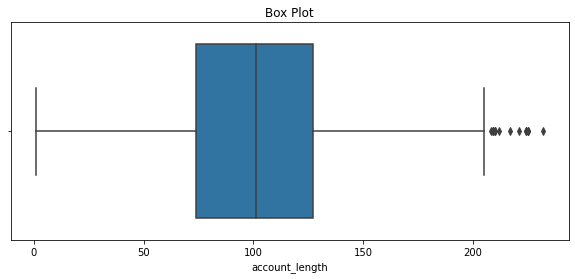

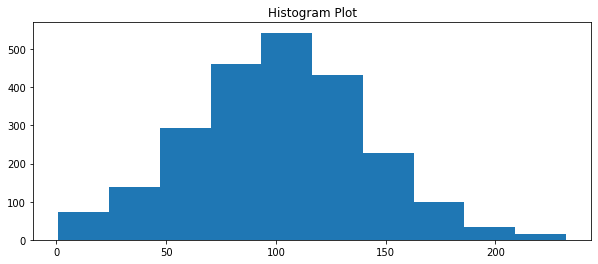

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


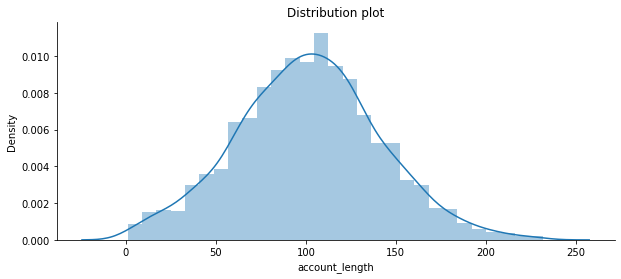

In [ ]:
plotall(df['account_length'])

In [ ]:
statval(df,'account_length')

Mean:  101.38056155507559
Median:  101.0
Mode:  0    105.0
dtype: float64


In [ ]:
df['account_length'].unique()

array([ 15., 105.,  97., 121.,  98., 151., 170.,  39.,  94.,  93.,  61.,
       137.,  85., 113., 101.,  32., 149.,  54.,  52., 174., 160., 122.,
        96.,  79.,  24.,  55.,  63., 117.,  71.,  56., 110., 108.,  74.,
        95.,  99.,  10.,  90.,  86., 177.,  75., 131., 135., 102.,  50.,
        73., 123., 164., 142.,  69., 134.,  82., 126., 162.,  84., 143.,
       125., 106., 100., 152.,  80., 148.,  44., 124.,  60., 167., 173.,
       139., 118., 104.,  91., 127., 138., 107., 129.,  77., 119., 171.,
       205.,  40., 116., 130.,  16.,  53., 115.,  31.,  70.,  83.,  64.,
       172.,  88.,  51., 140., 103.,  87.,  89., 169.,  76., 210.,  43.,
        66., 144.,  81., 109., 128., 161.,  35., 180., 189., 145., 209.,
       112.,  62., 120., 196.,  68.,  65., 146.,  72.,  27., 153.,  48.,
        67.,  33.,  42.,  45.,  46., 179., 166., 147., 157.,  34.,  23.,
       190.,  47.,  59.,  78.,  92., 163.,  41., 154.,  36.,  58.,  57.,
       158.,   1., 136., 111., 132., 150., 156.,   

In [ ]:
def iqr(df1,col):
  Q1 = df1[col].quantile(0.25)
  Q3 = df1[col].quantile(0.75)
  IQR = Q3 - Q1
  whisker_width = 1.5
  lower_whisker = Q1 -(whisker_width*IQR)
  upper_whisker = Q3 + (whisker_width*IQR)
  print("Q1: ", Q1)
  print("Q3: ", Q3)
  print("lower_whisker: ",lower_whisker)
  print("upper_whisker: ",upper_whisker)

In [ ]:
iqr(df,'account_length')

Q1:  74.0
Q3:  127.0
lower_whisker:  -5.5
upper_whisker:  206.5


In [ ]:
df[df['account_length'] >206.5] #16 rows

In [ ]:
df1 = df.copy(deep=True)

In [ ]:
df1.isna().sum()

customer_id               0
account_length            2
location_code             0
intertiol_plan            3
voice_mail_plan           6
number_vm_messages        3
total_day_min             1
total_day_calls           3
total_day_charge          5
total_eve_min             3
total_eve_calls           4
total_eve_charge          8
total_night_minutes       2
total_night_calls         5
total_night_charge        5
total_intl_minutes        2
total_intl_calls          3
total_intl_charge         5
customer_service_calls    1
Churn                     5
dtype: int64

In [ ]:
df1['account_length'] = df1['account_length'].fillna(df1['account_length'].median())
df1.isna().sum()

customer_id               0
account_length            0
location_code             0
intertiol_plan            3
voice_mail_plan           6
number_vm_messages        3
total_day_min             1
total_day_calls           3
total_day_charge          5
total_eve_min             3
total_eve_calls           4
total_eve_charge          8
total_night_minutes       2
total_night_calls         5
total_night_charge        5
total_intl_minutes        2
total_intl_calls          3
total_intl_charge         5
customer_service_calls    1
Churn                     5
dtype: int64

In [ ]:
df1.intertiol_plan.value_counts()

no     2033
yes     281
Name: intertiol_plan, dtype: int64

In [ ]:
print(df1['intertiol_plan'].mode())
df1['intertiol_plan'] = df1['intertiol_plan'].fillna(df1['intertiol_plan'].mode().iloc[0])
df1.intertiol_plan.isna().sum()

0    no
dtype: object


0

In [ ]:
df1.intertiol_plan.value_counts()

no     2036
yes     281
Name: intertiol_plan, dtype: int64

In [ ]:
df1.voice_mail_plan.value_counts()

no     1716
yes     595
Name: voice_mail_plan, dtype: int64

In [ ]:
df1['voice_mail_plan'].mode().iloc[0]

'no'

In [ ]:
df1['voice_mail_plan'] = df1['voice_mail_plan'].fillna(df1['voice_mail_plan'].mode().iloc[0])
print(df1.voice_mail_plan.isna().sum())
print(df1.voice_mail_plan.value_counts())

0
no     1722
yes     595
Name: voice_mail_plan, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


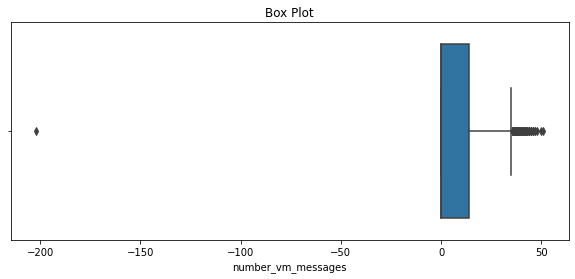

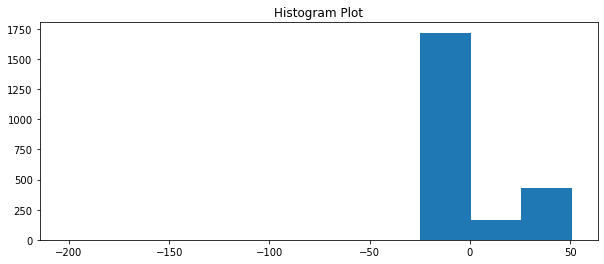

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


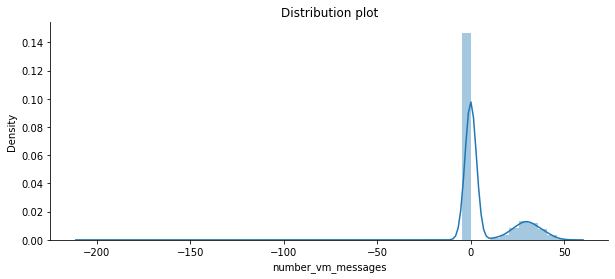

In [ ]:
plotall(df1['number_vm_messages'])

In [ ]:
df1[df1['number_vm_messages']<0]

,customer_id,account_length,location_code,intertiol_plan,voice_mail_plan,number_vm_messages,total_day_min,total_day_calls,total_day_charge,total_eve_min,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,Churn
1338,2339,41.0,445,no,no,-202.0,202.9,97.0,34.49,153.8,104.0,13.07,113.5,92.0,5.11,9.0,3.0,2.43,3.0,No


In [ ]:
df1['number_vm_messages'].unique()

array([   0.,   32.,   35.,   22.,   17.,   42.,   31.,   30.,   28.,
         29.,   25.,   33.,   41.,   23.,   46.,   38.,   34.,   36.,
         19.,   27.,   24.,   39.,    9.,   45.,   nan,   40.,   13.,
         18.,   37.,   26.,   21.,   14.,   20.,   44.,   43.,   12.,
         16.,   15.,   51.,    4.,   48.,   11., -202.,   47.,   50.])

In [ ]:
statval(df1,'number_vm_messages')

Mean:  7.570440795159897
Median:  0.0
Mode:  0    0.0
dtype: float64


In [ ]:
df1['number_vm_messages'].value_counts()

 0.0      1719
 31.0       41
 29.0       35
 28.0       33
 30.0       32
 26.0       28
 33.0       28
 35.0       26
 32.0       26
 27.0       25
 24.0       24
 25.0       23
 36.0       23
 34.0       21
 23.0       20
 37.0       20
 38.0       19
 21.0       17
 22.0       16
 39.0       16
 42.0       13
 41.0       13
 20.0       13
 40.0        9
 17.0        9
 19.0        9
 43.0        8
 16.0        7
 14.0        5
 44.0        5
 18.0        4
 12.0        4
 45.0        3
 13.0        3
 46.0        3
 15.0        3
 11.0        2
 47.0        2
 9.0         2
 48.0        1
 4.0         1
-202.0       1
 51.0        1
 50.0        1
Name: number_vm_messages, dtype: int64

In [ ]:
df1['number_vm_messages'][df1['number_vm_messages'] < 0] = df1['number_vm_messages'].median()  #replace negative value by median

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


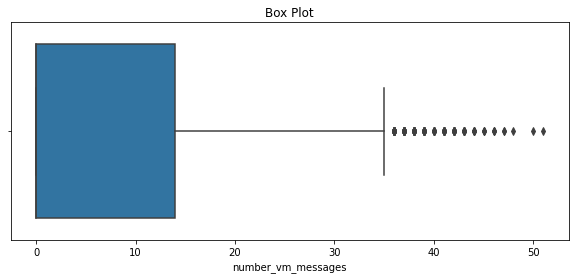

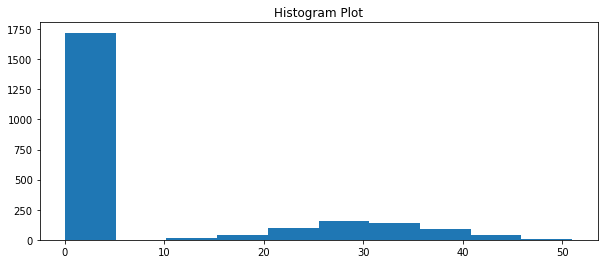

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


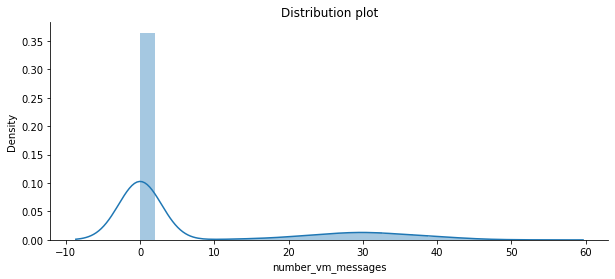

In [ ]:
plotall(df1['number_vm_messages'])

In [ ]:
statval(df1,'number_vm_messages')

Mean:  7.657735522904062
Median:  0.0
Mode:  0    0.0
dtype: float64


In [ ]:
iqr(df1,'number_vm_messages')

Q1:  0.0
Q3:  14.0
lower_whisker:  -21.0
upper_whisker:  35.0


In [ ]:
df1[df1['number_vm_messages']>35] #137 rows

In [ ]:
df1['number_vm_messages'] = df1['number_vm_messages'].fillna(df1['number_vm_messages'].median())
print(df1.number_vm_messages.isna().sum())

0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


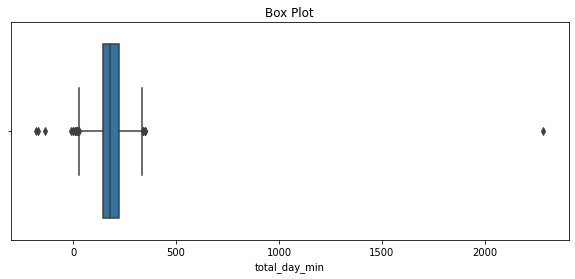

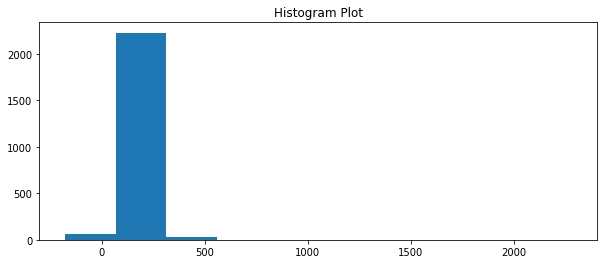

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


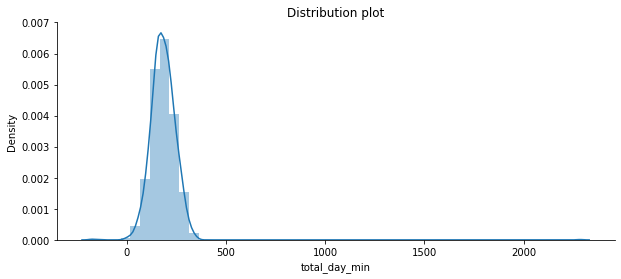

In [ ]:
plotall(df1['total_day_min'])

In [ ]:
df1[df1['total_day_min']<0]

,customer_id,account_length,location_code,intertiol_plan,voice_mail_plan,number_vm_messages,total_day_min,total_day_calls,total_day_charge,total_eve_min,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,Churn
1118,2119,120.0,445,yes,no,0.0,-179.9,72.0,NaN,170.0,98.0,NaN,190.6,89.0,8.58,13.8,2.0,3.73,1.0,Yes
1132,2133,98.0,452,no,no,0.0,-12.0,-1.0,-1.00,157.6,126.0,12.57,155.1,89.0,7.52,6.8,2.0,1.84,4.0,Yes
1328,2329,76.0,452,no,no,0.0,-171.1,78.0,29.09,257.2,NaN,21.86,91.6,92.0,4.12,16.2,3.0,4.37,1.0,No
2090,3091,60.0,445,no,no,0.0,-135.4,134.0,23.02,205.9,85.0,NaN,204.0,103.0,9.18,7.9,4.0,2.13,1.0,No


In [ ]:
df1['total_day_min'].value_counts()

175.4    7
185.0    7
146.3    6
184.5    6
157.1    6
        ..
232.3    1
165.9    1
287.4    1
224.1    1
191.2    1
Name: total_day_min, Length: 1410, dtype: int64

In [ ]:
df1['total_day_min'].describe()

count    2316.000000
mean      182.729447
std        73.379103
min      -179.900000
25%       144.000000
50%       180.350000
75%       221.000000
max      2283.900000
Name: total_day_min, dtype: float64

In [ ]:
# df1[df1['total_day_min']==179.9] 3 rows
# df1[df1['total_day_min']==12.0] 0 rows but 1 row has 12.5
#df1[df1['total_day_min']==171.1] 0 rows but 5 rows have 171.2
df1[df1['total_day_min']==135.4] #2 rows

,customer_id,account_length,location_code,intertiol_plan,voice_mail_plan,number_vm_messages,total_day_min,total_day_calls,total_day_charge,total_eve_min,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,Churn
1223,2224,82.0,452,no,no,0.0,135.4,102.0,23.02,237.1,122.0,20.15,118.3,91.0,5.32,17.5,4.0,4.73,0.0,No
2007,3008,69.0,547,no,no,0.0,135.4,101.0,23.02,238.1,124.0,20.24,195.6,102.0,8.80,10.6,2.0,2.86,1.0,No


In [ ]:
df1['total_day_min_changed'] = df1['total_day_min']

In [ ]:
df1.loc[(df1['total_day_min'] < 0 ), 'total_day_min'] = -1 * df1['total_day_min']

In [ ]:
df1.drop(['total_day_min_changed'],axis=1,inplace=True)

In [ ]:
df1[df1['total_day_min'] < 0]

,customer_id,account_length,location_code,intertiol_plan,voice_mail_plan,number_vm_messages,total_day_min,total_day_calls,total_day_charge,total_eve_min,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,Churn


In [ ]:
statval(df1,'total_day_min')

Mean:  183.15984455958545
Median:  180.35000000000002
Mode:  0    175.4
1    185.0
dtype: float64
Min:  0.0
Max:  2283.9


In [ ]:
iqr(df1,'total_day_min')

Q1:  144.17499999999998
Q3:  221.0
lower_whisker:  28.937499999999957
upper_whisker:  336.2375


In [ ]:
df1[df1['total_day_min'] > 336.2375]

,customer_id,account_length,location_code,intertiol_plan,voice_mail_plan,number_vm_messages,total_day_min,total_day_calls,total_day_charge,total_eve_min,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,Churn
675,1676,81.0,452,no,no,0.0,341.7,46.0,56.20,232.4,78.0,19.09,202.6,81.0,8.44,13.1,5.0,3.54,0.0,Yes
791,1792,129.0,547,no,no,0.0,349.3,111.0,54.83,195.1,105.0,16.33,199.0,83.0,8.59,10.4,6.0,2.81,0.0,Yes
851,1852,144.0,452,no,yes,51.0,2283.9,98.0,48.26,192.0,109.0,16.32,196.3,85.0,8.83,10.0,4.0,2.70,1.0,No
1553,2554,154.0,452,no,no,0.0,338.8,74.0,58.64,230.5,98.0,19.40,248.9,95.0,11.43,10.1,9.0,2.73,1.0,Yes
1854,2855,154.0,452,no,no,0.0,350.8,75.0,59.64,216.5,94.0,18.40,253.9,100.0,11.43,10.1,9.0,2.73,1.0,Yes
1984,2985,64.0,452,yes,no,0.0,340.8,61.0,60.96,258.5,77.0,21.21,263.4,101.0,12.39,13.3,8.0,3.59,1.0,Yes
2035,3036,64.0,452,yes,no,0.0,346.8,55.0,58.96,249.5,79.0,21.21,275.4,102.0,12.39,13.3,9.0,3.59,1.0,Yes


In [ ]:
round(df1['total_day_min'].median(),0)

180.0

In [ ]:
#replacing the total_day_min 2283.9 with the median
df1.loc[(df1['total_day_min'] > 360 ), 'total_day_min'] = round(df1['total_day_min'].median(),0)

In [ ]:
df.loc[df['voice_mail_plan'].isna()]

,customer_id,account_length,location_code,intertiol_plan,voice_mail_plan,number_vm_messages,total_day_min,total_day_calls,total_day_charge,total_eve_min,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,Churn
180,1181,24.0,445,no,NaN,NaN,151.0,70.0,25.33,126.0,87.0,11.14,224.6,67.0,NaN,8.6,2.0,2.32,2.0,Yes
728,1729,NaN,452,NaN,NaN,0.0,111.1,126.0,18.89,313.4,95.0,26.64,215.7,82.0,9.71,10.5,6.0,2.84,1.0,No
1109,2110,89.0,547,no,NaN,0.0,303.9,95.0,51.66,NaN,114.0,22.18,312.1,89.0,14.04,5.3,3.0,1.43,1.0,Yes
1407,2408,120.0,547,no,NaN,0.0,192.6,123.0,32.74,206.4,105.0,17.54,283.2,93.0,12.74,10.8,3.0,2.92,1.0,No
2090,3091,60.0,445,no,NaN,0.0,-135.4,134.0,23.02,205.9,85.0,NaN,204.0,103.0,9.18,7.9,4.0,2.13,1.0,No
2200,3201,75.0,452,no,NaN,0.0,150.6,99.0,-25.60,301.5,83.0,25.63,158.7,NaN,7.14,8.1,5.0,2.19,0.0,No


In [ ]:
df.loc[df['number_vm_messages'].isna()]

,customer_id,account_length,location_code,intertiol_plan,voice_mail_plan,number_vm_messages,total_day_min,total_day_calls,total_day_charge,total_eve_min,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,Churn
180,1181,24.0,445,no,NaN,NaN,151.0,70.0,25.33,126.0,87.0,11.14,224.6,67.0,NaN,8.6,2.0,2.32,2.0,Yes
654,1655,106.0,452,no,no,NaN,187.1,104.0,31.81,250.2,117.0,NaN,144.9,81.0,NaN,11.0,3.0,2.97,1.0,No
1004,2005,133.0,445,no,yes,NaN,174.0,80.0,29.58,209.4,113.0,17.80,224.1,87.0,10.08,14.1,7.0,3.81,2.0,Yes


In [ ]:
df.loc[(df['number_vm_messages']!=0.0) & (df['voice_mail_plan'] == 'no')]

,customer_id,account_length,location_code,intertiol_plan,voice_mail_plan,number_vm_messages,total_day_min,total_day_calls,total_day_charge,total_eve_min,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,Churn
654,1655,106.0,452,no,no,NaN,187.1,104.0,31.81,250.2,117.0,NaN,144.9,81.0,NaN,11.0,3.0,2.97,1.0,No
1338,2339,41.0,445,no,no,-202.0,202.9,97.0,34.49,153.8,104.0,13.07,113.5,92.0,5.11,9.0,3.0,2.43,3.0,No


In [ ]:
df.loc[(df['number_vm_messages']==0.0) & (df['voice_mail_plan'] == 'yes')]

,customer_id,account_length,location_code,intertiol_plan,voice_mail_plan,number_vm_messages,total_day_min,total_day_calls,total_day_charge,total_eve_min,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,Churn


Imputing missing values for voice_mail_plan and number_vm_messages again...


But, voice_mail_plan nans were filled with mode which is 'no' and the corresponding number_vm_messages are either 0 or nan - so no  need to change anything on that

In [ ]:
df1['number_vm_messages'] = df['number_vm_messages']

In [ ]:
df1.loc[df1['number_vm_messages'].isna()]

,customer_id,account_length,location_code,intertiol_plan,voice_mail_plan,number_vm_messages,total_day_min,total_day_calls,total_day_charge,total_eve_min,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,Churn
180,1181,24.0,445,no,no,NaN,151.0,70.0,25.33,126.0,87.0,11.14,224.6,67.0,NaN,8.6,2.0,2.32,2.0,Yes
654,1655,106.0,452,no,no,NaN,187.1,104.0,31.81,250.2,117.0,NaN,144.9,81.0,NaN,11.0,3.0,2.97,1.0,No
1004,2005,133.0,445,no,yes,NaN,174.0,80.0,29.58,209.4,113.0,17.80,224.1,87.0,10.08,14.1,7.0,3.81,2.0,Yes


In [ ]:
df1.loc[(df1['number_vm_messages'].isna()) & (df1['voice_mail_plan'] == 'no'),'number_vm_messages'] = 0.0 #bcz without a voice_mail_plan, can't have voice mail messages

In [ ]:
dfwithvoicepln = df1[df1['voice_mail_plan']=='yes']
statval(dfwithvoicepln,'number_vm_messages')

Mean:  29.83164983164983
Median:  30.0
Mode:  0    31.0
dtype: float64
Min:  4.0
Max:  51.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


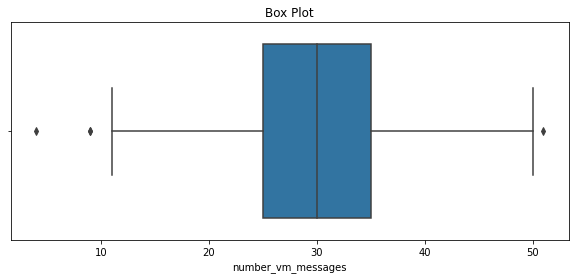

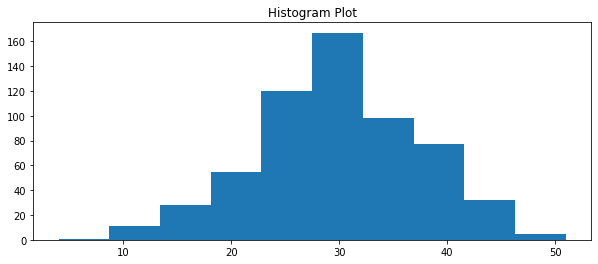

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


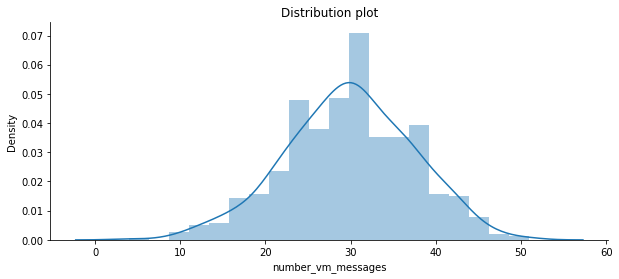

In [ ]:
plotall(dfwithvoicepln['number_vm_messages'])

In [ ]:
print(dfwithvoicepln['number_vm_messages'].median())
df1.loc[(df1['number_vm_messages'].isna()) & (df1['voice_mail_plan'] == 'yes'),'number_vm_messages'] = dfwithvoicepln['number_vm_messages'].median()

30.0


In [ ]:
df1.loc[(df1['number_vm_messages']!=0.0) & (df1['voice_mail_plan'] == 'no')]

,customer_id,account_length,location_code,intertiol_plan,voice_mail_plan,number_vm_messages,total_day_min,total_day_calls,total_day_charge,total_eve_min,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,Churn


In [ ]:
df1.loc[(df1['number_vm_messages']< 0.0),'number_vm_messages'] = 0.0

Resuming the cleaning from total_day_min

In [ ]:
df1[df1['total_day_min'].isna()]

,customer_id,account_length,location_code,intertiol_plan,voice_mail_plan,number_vm_messages,total_day_min,total_day_calls,total_day_charge,total_eve_min,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,Churn
1882,2883,126.0,452,no,no,0.0,NaN,102.0,38.88,168.7,99.0,NaN,223.5,100.0,10.06,11.8,4.0,3.19,1.0,No


In [ ]:
statval(dfdaycall,'day_call_min_charge')

Mean:  0.1695785697443977
Median:  0.17
Mode:  0    0.17
dtype: float64
Min:  -0.17001753360607832
Max:  0.22321724709784413


In [ ]:
daymincharge = dfdaycall['day_call_min_charge'].median()
daymincharge

0.17

In [ ]:
df1[df1['total_day_min'].isna()].total_day_charge/daymincharge

1882    228.705882
Name: total_day_charge, dtype: float64

In [ ]:
print(round(df1.loc[df1['total_day_min'].isna()]['total_day_charge']/daymincharge,1))

1882    228.7
Name: total_day_charge, dtype: float64


In [ ]:
df1.loc[df1['total_day_min'].isna(),'total_day_min'] = round(df1.loc[df1['total_day_min'].isna()]['total_day_charge']/daymincharge,1)
df1.loc[df1['customer_id'] == 2883]

,customer_id,account_length,location_code,intertiol_plan,voice_mail_plan,number_vm_messages,total_day_min,total_day_calls,total_day_charge,total_eve_min,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,Churn
1882,2883,126.0,452,no,no,0.0,228.7,102.0,38.88,168.7,99.0,NaN,223.5,100.0,10.06,11.8,4.0,3.19,1.0,No


In [ ]:
df1.loc[df1['total_day_calls'].isna()]

,customer_id,account_length,location_code,intertiol_plan,voice_mail_plan,number_vm_messages,total_day_min,total_day_calls,total_day_charge,total_eve_min,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,Churn
647,1648,160.0,452,no,no,0.0,256.0,NaN,43.52,187.4,61.0,15.93,NaN,81.0,5.36,11.5,4.0,3.11,3.0,No
1131,2132,111.0,547,no,no,0.0,179.9,NaN,29.07,106.8,58.0,9.74,209.7,89.0,9.62,10.5,NaN,NaN,4.0,Yes
1907,2908,164.0,547,no,no,0.0,192.1,NaN,32.66,249.8,94.0,21.23,132.6,100.0,5.97,7.3,3.0,1.97,3.0,No


In [ ]:
statval(df1,'total_day_calls')

Mean:  105.34615384615384
Median:  102.0
Mode:  0    102.0
dtype: float64
Min:  -1.0
Max:  10700.0


In [ ]:
df1.loc[df1['total_day_min']==192.1]

,customer_id,account_length,location_code,intertiol_plan,voice_mail_plan,number_vm_messages,total_day_min,total_day_calls,total_day_charge,total_eve_min,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,Churn
24,1025,174.0,445,no,no,0.0,192.1,97.0,32.66,169.9,94.0,14.44,166.6,54.0,7.50,11.4,4.0,3.08,1.0,No
1428,2429,116.0,547,no,no,0.0,192.1,98.0,32.66,312.9,135.0,26.60,130.2,94.0,5.86,7.9,2.0,2.13,3.0,No
1907,2908,164.0,547,no,no,0.0,192.1,NaN,32.66,249.8,94.0,21.23,132.6,100.0,5.97,7.3,3.0,1.97,3.0,No


In [ ]:
df1.loc[df1['total_day_calls']==102.0]

In [ ]:
df1['total_day_calls'] = df1['total_day_calls'].fillna(df1['total_day_calls'].median())
df1.loc[df1['total_day_calls'].isna()]

,customer_id,account_length,location_code,intertiol_plan,voice_mail_plan,number_vm_messages,total_day_min,total_day_calls,total_day_charge,total_eve_min,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,Churn


In [ ]:
df1.loc[df1['total_day_charge'].isna()]

,customer_id,account_length,location_code,intertiol_plan,voice_mail_plan,number_vm_messages,total_day_min,total_day_calls,total_day_charge,total_eve_min,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,Churn
298,1299,106.0,445,no,yes,29.0,83.6,131.0,NaN,203.9,131.0,NaN,229.5,73.0,10.33,NaN,3.0,2.19,1.0,No
525,1526,85.0,452,no,no,0.0,236.9,93.0,NaN,197.7,113.0,16.80,309.1,78.0,13.91,11.4,7.0,3.08,2.0,Yes
1118,2119,120.0,445,yes,no,0.0,179.9,72.0,NaN,170.0,98.0,NaN,190.6,89.0,8.58,13.8,2.0,3.73,1.0,Yes
1767,2768,32.0,445,no,yes,26.0,266.7,109.0,NaN,232.3,107.0,19.75,212.8,98.0,9.58,16.3,4.0,4.40,1.0,No
1887,2888,122.0,445,no,no,0.0,231.2,141.0,NaN,267.8,136.0,22.76,240.3,NaN,10.81,8.8,5.0,2.38,1.0,Yes


In [ ]:
df1.loc[df1['total_day_charge'].isna(),'total_day_charge'] = round(df1.loc[df1['total_day_charge'].isna()]['total_day_min']*daymincharge,2)
df1.loc[df1['total_day_charge'].isna()]

,customer_id,account_length,location_code,intertiol_plan,voice_mail_plan,number_vm_messages,total_day_min,total_day_calls,total_day_charge,total_eve_min,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,Churn


In [ ]:
# df1.loc[df1['customer_id']==1299]
# df1.loc[df1['customer_id']==1526]
# df1.loc[df1['customer_id']==2119]
# df1.loc[df1['customer_id']==2768]
df1.loc[df1['customer_id']==2888]

,customer_id,account_length,location_code,intertiol_plan,voice_mail_plan,number_vm_messages,total_day_min,total_day_calls,total_day_charge,total_eve_min,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,Churn
1887,2888,122.0,445,no,no,0.0,231.2,141.0,39.3,267.8,136.0,22.76,240.3,NaN,10.81,8.8,5.0,2.38,1.0,Yes


In [ ]:
df1.describe()

,customer_id,account_length,location_code,number_vm_messages,total_day_min,total_day_calls,total_day_charge,total_eve_min,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls
count,2317.000000,2317.000000,2317.000000,2317.000000,2317.000000,2317.000000,2317.000000,2314.000000,2313.000000,2309.000000,2315.000000,2312.000000,2312.000000,2315.000000,2314.000000,2312.000000,2316.000000
mean,2160.595166,101.380233,473.470004,7.660768,182.271472,105.341821,30.969707,203.560156,100.131863,17.126951,209.487084,87.634948,9.434183,10.251317,4.439931,2.774338,1.652418
std,670.138937,39.973102,42.011447,13.578330,57.613477,221.145703,9.838623,115.611156,20.537867,4.323342,408.413346,12.742429,18.671979,2.795021,2.461476,0.733359,1.429283
min,1001.000000,1.000000,445.000000,0.000000,0.000000,-1.000000,-25.600000,-103.300000,-80.000000,0.000000,23.200000,33.000000,1.040000,-9.300000,0.000000,0.000000,0.000000
25%,1580.000000,74.000000,445.000000,0.000000,144.200000,87.000000,24.480000,166.050000,87.000000,14.180000,167.250000,79.000000,7.530000,8.600000,3.000000,2.320000,1.000000
50%,2161.000000,101.000000,452.000000,0.000000,180.300000,102.000000,30.600000,202.450000,101.000000,17.220000,201.100000,90.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,2741.000000,127.000000,452.000000,14.000000,221.000000,115.000000,37.620000,236.400000,114.000000,20.090000,235.000000,98.000000,10.580000,12.000000,6.000000,3.240000,2.000000
max,3321.000000,232.000000,547.000000,51.000000,350.800000,10700.000000,60.960000,5186.400000,170.000000,30.830000,19700.000000,105.000000,900.150000,18.300000,20.000000,4.940000,9.000000


In [ ]:
iqr(df1,'total_day_calls')

Q1:  87.0
Q3:  115.0
lower_whisker:  45.0
upper_whisker:  157.0


In [ ]:
df1[df1['total_day_calls'] > 157]

,customer_id,account_length,location_code,intertiol_plan,voice_mail_plan,number_vm_messages,total_day_min,total_day_calls,total_day_charge,total_eve_min,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,Churn
7,1008,39.0,445,no,no,0.0,60.4,158.0,10.27,306.2,120.0,26.03,123.9,46.0,5.58,12.4,3.0,3.35,1.0,No
434,1435,80.0,452,no,no,0.0,198.1,160.0,33.68,156.7,87.0,13.32,182.1,76.0,8.19,9.3,3.0,2.51,3.0,No
567,1568,132.0,445,no,no,0.0,169.9,10700.0,28.88,209.4,121.0,17.80,206.1,79.0,9.27,11.5,2.0,3.11,1.0,No
651,1652,91.0,452,no,no,0.0,154.4,165.0,26.25,168.3,121.0,14.31,239.9,81.0,10.80,11.7,4.0,3.16,5.0,Yes
735,1736,91.0,452,no,no,0.0,164.4,165.0,25.25,157.3,122.0,13.31,226.9,82.0,10.80,11.7,3.0,3.16,5.0,Yes
1192,2193,101.0,445,no,no,0.0,232.0,159.0,38.63,269.0,109.0,23.21,288.2,90.0,12.52,13.5,9.0,3.65,1.0,Yes
2131,3132,86.0,452,no,yes,38.0,123.0,158.0,20.91,133.9,119.0,11.38,138.2,103.0,6.22,13.3,4.0,3.59,1.0,No
2135,3136,90.0,547,no,no,0.0,125.4,158.0,21.32,269.1,83.0,22.87,238.6,103.0,10.74,11.0,7.0,2.97,1.0,No
2240,3241,86.0,452,no,yes,32.0,70.9,163.0,12.05,166.7,121.0,14.17,244.9,105.0,11.02,11.1,5.0,3.00,3.0,No


In [ ]:
df1.loc[df1['total_day_calls']>170,'total_day_calls'] = df1['total_day_calls'].median()

In [ ]:
iqr(df1,'total_day_charge')

Q1:  24.495
Q3:  37.605000000000004
lower_whisker:  4.829999999999995
upper_whisker:  57.27000000000001


In [ ]:
df1[df1['total_day_charge'] > 57]

,customer_id,account_length,location_code,intertiol_plan,voice_mail_plan,number_vm_messages,total_day_min,total_day_calls,total_day_charge,total_eve_min,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,Churn
1553,2554,154.0,452,no,no,0.0,338.8,74.0,58.64,230.5,98.0,19.40,248.9,95.0,11.43,10.1,9.0,2.73,1.0,Yes
1854,2855,154.0,452,no,no,0.0,350.8,75.0,59.64,216.5,94.0,18.40,253.9,100.0,11.43,10.1,9.0,2.73,1.0,Yes
1984,2985,64.0,452,yes,no,0.0,340.8,61.0,60.96,258.5,77.0,21.21,263.4,101.0,12.39,13.3,8.0,3.59,1.0,Yes
2035,3036,64.0,452,yes,no,0.0,346.8,55.0,58.96,249.5,79.0,21.21,275.4,102.0,12.39,13.3,9.0,3.59,1.0,Yes
2068,3069,115.0,547,yes,no,0.0,329.3,78.0,57.70,194.4,104.0,17.29,202.5,102.0,9.79,11.8,8.0,3.19,1.0,Yes
2069,3070,82.0,547,no,no,0.0,313.8,75.0,58.07,210.3,122.0,17.71,272.1,102.0,12.02,10.6,6.0,2.86,0.0,Yes


In [ ]:
dfevecall = df[['total_eve_min','total_eve_charge']]
dfevecall['eve_call_min_charge'] = dfevecall['total_eve_charge']/dfevecall['total_eve_min']
print(dfevecall.head())
statval(dfevecall,'eve_call_min_charge')

   total_eve_min  total_eve_charge  eve_call_min_charge
0          216.0             18.36             0.085000
1          175.2             14.89             0.084989
2          269.1             22.87             0.084987
3          209.2             17.78             0.084990
4           93.4              7.94             0.085011
Mean:  0.08495946743839301
Median:  0.085
Mode:  0    0.085
dtype: float64
Min:  -0.08499515972894482
Max:  0.11086637298091043


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df1.loc[df1['total_eve_min'].isna()]

,customer_id,account_length,location_code,intertiol_plan,voice_mail_plan,number_vm_messages,total_day_min,total_day_calls,total_day_charge,total_eve_min,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,Churn
492,1493,125.0,452,no,no,0.0,140.1,132.0,23.82,NaN,126.0,17.82,264.1,NaN,11.88,8.0,2.0,2.16,1.0,No
790,1791,112.0,452,no,no,0.0,120.9,98.0,19.02,NaN,139.0,10.69,143.8,83.0,6.61,14.1,4.0,3.81,5.0,Yes
1109,2110,89.0,547,no,no,0.0,303.9,95.0,51.66,NaN,114.0,22.18,312.1,89.0,14.04,5.3,3.0,1.43,1.0,Yes


In [ ]:
evemincharge = dfevecall['eve_call_min_charge'].median()
evemincharge

0.085

In [ ]:
df1.loc[df1['total_eve_min'].isna(),'total_eve_min'] = round(df1.loc[df1['total_eve_min'].isna()]['total_eve_charge']/evemincharge,1)
df1.loc[df1['total_eve_min'].isna()]

,customer_id,account_length,location_code,intertiol_plan,voice_mail_plan,number_vm_messages,total_day_min,total_day_calls,total_day_charge,total_eve_min,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,Churn


Forgot to handle the negative outliers in the previous cols... So going back to those...

In [ ]:
df1.loc[df1['total_day_calls']<0]

,customer_id,account_length,location_code,intertiol_plan,voice_mail_plan,number_vm_messages,total_day_min,total_day_calls,total_day_charge,total_eve_min,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,Churn
1132,2133,98.0,452,no,no,0.0,12.0,-1.0,-1.0,157.6,126.0,12.57,155.1,89.0,7.52,6.8,2.0,1.84,4.0,Yes


In [ ]:
iqr(df1,'total_day_calls')

Q1:  87.0
Q3:  115.0
lower_whisker:  45.0
upper_whisker:  157.0


In [ ]:
Q1 = df1['total_day_calls'].quantile(0.25)
Q3 = df1['total_day_calls'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
df1.loc[df1['total_day_calls']<0,'total_day_calls'] = lower_whisker

In [ ]:
df1.loc[df1['total_day_charge']<0]

,customer_id,account_length,location_code,intertiol_plan,voice_mail_plan,number_vm_messages,total_day_min,total_day_calls,total_day_charge,total_eve_min,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,Churn
1132,2133,98.0,452,no,no,0.0,12.0,45.0,-1.0,157.6,126.0,12.57,155.1,89.0,7.52,6.8,2.0,1.84,4.0,Yes
2200,3201,75.0,452,no,no,0.0,150.6,99.0,-25.6,301.5,83.0,25.63,158.7,NaN,7.14,8.1,5.0,2.19,0.0,No


In [ ]:
df1.loc[df1['total_day_charge']<0,'total_day_charge'] = round(df1.loc[df1['total_day_charge']<0]['total_day_min']*daymincharge,2)
df1.loc[df1['total_day_charge']<0]

,customer_id,account_length,location_code,intertiol_plan,voice_mail_plan,number_vm_messages,total_day_min,total_day_calls,total_day_charge,total_eve_min,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,Churn


Resuming cleaning of evening calls

In [ ]:
df1.describe()

,customer_id,account_length,location_code,number_vm_messages,total_day_min,total_day_calls,total_day_charge,total_eve_min,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls
count,2317.000000,2317.000000,2317.000000,2317.000000,2317.000000,2317.000000,2317.000000,2317.000000,2313.000000,2309.000000,2315.000000,2312.000000,2312.000000,2315.000000,2314.000000,2312.000000,2316.000000
mean,2160.595166,101.380233,473.470004,7.660768,182.271472,100.787656,30.993116,203.553949,100.131863,17.126951,209.487084,87.634948,9.434183,10.251317,4.439931,2.774338,1.652418
std,670.138937,39.973102,42.011447,13.578330,57.613477,20.385570,9.764667,115.553763,20.537867,4.323342,408.413346,12.742429,18.671979,2.795021,2.461476,0.733359,1.429283
min,1001.000000,1.000000,445.000000,0.000000,0.000000,0.000000,0.000000,-103.300000,-80.000000,0.000000,23.200000,33.000000,1.040000,-9.300000,0.000000,0.000000,0.000000
25%,1580.000000,74.000000,445.000000,0.000000,144.200000,87.000000,24.500000,166.000000,87.000000,14.180000,167.250000,79.000000,7.530000,8.600000,3.000000,2.320000,1.000000
50%,2161.000000,101.000000,452.000000,0.000000,180.300000,102.000000,30.600000,202.500000,101.000000,17.220000,201.100000,90.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,2741.000000,127.000000,452.000000,14.000000,221.000000,115.000000,37.620000,236.400000,114.000000,20.090000,235.000000,98.000000,10.580000,12.000000,6.000000,3.240000,2.000000
max,3321.000000,232.000000,547.000000,51.000000,350.800000,165.000000,60.960000,5186.400000,170.000000,30.830000,19700.000000,105.000000,900.150000,18.300000,20.000000,4.940000,9.000000


In [ ]:
iqr(df1,'total_eve_min')

Q1:  166.0
Q3:  236.4
lower_whisker:  60.39999999999999
upper_whisker:  342.0


In [ ]:
df1.loc[(df1['total_eve_min'] < 0) | (df1['total_eve_min'] > 360)]

,customer_id,account_length,location_code,intertiol_plan,voice_mail_plan,number_vm_messages,total_day_min,total_day_calls,total_day_charge,total_eve_min,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,Churn
312,1313,59.0,445,no,yes,27.0,127.4,110.0,21.66,-103.3,99.0,8.78,164.2,73.0,7.39,9.1,3.0,2.46,0.0,No
380,1381,101.0,452,no,yes,29.0,121.1,116.0,20.59,5186.4,100.0,15.84,241.7,75.0,10.88,10.1,6.0,2.73,0.0,No


In [ ]:
df1.loc[(df1['total_eve_min'] < 0) | (df1['total_eve_min'] > 360), 'total_eve_min'] = round(df1.loc[(df1['total_eve_min'] < 0) | (df1['total_eve_min'] > 360)]['total_eve_charge']/evemincharge,1)

In [ ]:
df1.loc[df1['customer_id'] == 1381]

,customer_id,account_length,location_code,intertiol_plan,voice_mail_plan,number_vm_messages,total_day_min,total_day_calls,total_day_charge,total_eve_min,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,Churn
380,1381,101.0,452,no,yes,29.0,121.1,116.0,20.59,186.4,100.0,15.84,241.7,75.0,10.88,10.1,6.0,2.73,0.0,No


In [ ]:
df1.loc[df1['total_eve_calls'].isna()]

,customer_id,account_length,location_code,intertiol_plan,voice_mail_plan,number_vm_messages,total_day_min,total_day_calls,total_day_charge,total_eve_min,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,Churn
803,1804,87.0,452,no,no,0.0,240.0,83.0,40.80,134.1,NaN,11.40,189.1,84.0,8.51,9.3,2.0,2.51,0.0,Yes
1328,2329,76.0,452,no,no,0.0,171.1,78.0,29.09,257.2,NaN,21.86,91.6,92.0,4.12,16.2,3.0,4.37,1.0,No
1365,2366,98.0,547,yes,no,0.0,158.4,71.0,26.93,306.6,NaN,26.06,144.2,93.0,6.49,2.1,4.0,0.57,1.0,No
2037,3038,160.0,452,no,no,0.0,206.3,66.0,35.07,241.1,NaN,20.49,227.8,102.0,10.25,11.7,6.0,3.16,0.0,No


In [ ]:
statval(df1,'total_eve_calls')

Mean:  100.13186338089062
Median:  101.0
Mode:  0    105.0
dtype: float64
Min:  -80.0
Max:  170.0


In [ ]:
print(df1['total_eve_calls'].median())

101.0


In [ ]:
df1.loc[df1['total_eve_calls'].isna(),'total_eve_calls'] = df1['total_eve_calls'].median()
df1.loc[df1['total_eve_calls'].isna()]

,customer_id,account_length,location_code,intertiol_plan,voice_mail_plan,number_vm_messages,total_day_min,total_day_calls,total_day_charge,total_eve_min,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,Churn


In [ ]:
iqr(df1,'total_eve_calls')

Q1:  87.0
Q3:  114.0
lower_whisker:  46.5
upper_whisker:  154.5


In [ ]:
df1.loc[df1['total_eve_calls']<0]

,customer_id,account_length,location_code,intertiol_plan,voice_mail_plan,number_vm_messages,total_day_min,total_day_calls,total_day_charge,total_eve_min,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,Churn
678,1679,156.0,547,no,no,0.0,123.7,96.0,21.03,103.0,-80.0,8.76,189.4,82.0,NaN,13.1,4.0,3.54,1.0,No
900,1901,80.0,445,no,no,0.0,118.1,90.0,20.08,144.3,-77.0,12.27,225.1,86.0,10.13,-8.2,6.0,2.21,1.0,No


In [ ]:
df1.loc[df1['total_eve_calls']<0,'total_eve_calls'] = -1*df1.loc[df1['total_eve_calls']<0]['total_eve_calls']

In [ ]:
df1.loc[df1['total_eve_charge'].isna()]

,customer_id,account_length,location_code,intertiol_plan,voice_mail_plan,number_vm_messages,total_day_min,total_day_calls,total_day_charge,total_eve_min,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,Churn
11,1012,61.0,445,no,yes,31.0,288.7,101.0,49.08,203.8,102.0,NaN,203.2,49.0,9.14,8.6,3.0,2.32,0.0,No
298,1299,106.0,445,no,yes,29.0,83.6,131.0,14.21,203.9,131.0,NaN,229.5,73.0,10.33,NaN,3.0,2.19,1.0,No
654,1655,106.0,452,no,no,0.0,187.1,104.0,31.81,250.2,117.0,NaN,144.9,81.0,NaN,11.0,3.0,2.97,1.0,No
1118,2119,120.0,445,yes,no,0.0,179.9,72.0,30.58,170.0,98.0,NaN,190.6,89.0,8.58,13.8,2.0,3.73,1.0,Yes
1379,2380,101.0,445,no,no,0.0,239.0,156.0,40.63,273.0,106.0,NaN,278.2,93.0,12.52,13.5,8.0,3.65,1.0,Yes
1447,2448,184.0,452,no,no,0.0,236.4,73.0,40.19,287.3,120.0,NaN,192.0,94.0,8.64,13.8,4.0,3.73,1.0,Yes
1882,2883,126.0,452,no,no,0.0,228.7,102.0,38.88,168.7,99.0,NaN,223.5,100.0,10.06,11.8,4.0,3.19,1.0,No
2090,3091,60.0,445,no,no,0.0,135.4,134.0,23.02,205.9,85.0,NaN,204.0,103.0,9.18,7.9,4.0,2.13,1.0,No


In [ ]:
df1.loc[df1['total_eve_charge'].isna(),'total_eve_charge'] = round(df1.loc[df1['total_eve_charge'].isna()]['total_eve_min']*evemincharge,2)
df1.loc[df1['total_eve_charge'].isna()]

,customer_id,account_length,location_code,intertiol_plan,voice_mail_plan,number_vm_messages,total_day_min,total_day_calls,total_day_charge,total_eve_min,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,Churn


In [ ]:
df1.loc[df1['customer_id']==1012]

,customer_id,account_length,location_code,intertiol_plan,voice_mail_plan,number_vm_messages,total_day_min,total_day_calls,total_day_charge,total_eve_min,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,Churn
11,1012,61.0,445,no,yes,31.0,288.7,101.0,49.08,203.8,102.0,17.32,203.2,49.0,9.14,8.6,3.0,2.32,0.0,No


In [ ]:
iqr(df1,'total_eve_charge')

Q1:  14.19
Q3:  20.09
lower_whisker:  5.339999999999998
upper_whisker:  28.94


In [ ]:
df1.loc[df1['total_eve_charge']>28]

Night Calls

In [ ]:
df1.loc[df1['total_night_minutes'].isna()]

,customer_id,account_length,location_code,intertiol_plan,voice_mail_plan,number_vm_messages,total_day_min,total_day_calls,total_day_charge,total_eve_min,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,Churn
324,1325,103.0,547,no,no,0.0,167.8,121.0,28.53,212.9,123.0,18.10,NaN,73.0,9.37,13.0,3.0,3.51,5.0,No
647,1648,160.0,452,no,no,0.0,256.0,102.0,43.52,187.4,61.0,15.93,NaN,81.0,5.36,11.5,4.0,3.11,3.0,No


In [ ]:
dfnightcall = df[['total_night_minutes','total_night_charge']]
dfnightcall['night_call_min_charge'] = dfnightcall['total_night_charge']/dfnightcall['total_night_minutes']
print(dfnightcall.head())
statval(dfnightcall,'night_call_min_charge')

   total_night_minutes  total_night_charge  night_call_min_charge
0                235.1               10.58               0.045002
1                222.4               10.01               0.045009
2                203.5                9.16               0.045012
3                197.4                8.88               0.044985
4                107.6                4.84               0.044981
Mean:  0.04687649736690398
Median:  0.045
Mode:  0    0.045
dtype: float64
Min:  0.00045025380710659896
Max:  4.4276930644367924


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
nightmincharge = dfnightcall['night_call_min_charge'].median()
nightmincharge

0.045

In [ ]:
df1.loc[df1['total_night_minutes'].isna(),'total_night_minutes'] = round(df1.loc[df1['total_night_minutes'].isna()]['total_night_charge']/nightmincharge,1)
df1.loc[df1['total_night_minutes'].isna()]

,customer_id,account_length,location_code,intertiol_plan,voice_mail_plan,number_vm_messages,total_day_min,total_day_calls,total_day_charge,total_eve_min,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,Churn


In [ ]:
iqr(df1,'total_night_minutes')

Q1:  167.2
Q3:  235.0
lower_whisker:  65.49999999999997
upper_whisker:  336.70000000000005


In [ ]:
df1.loc[df1['total_night_minutes']>400]

,customer_id,account_length,location_code,intertiol_plan,voice_mail_plan,number_vm_messages,total_day_min,total_day_calls,total_day_charge,total_eve_min,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,Churn
1009,2010,51.0,445,no,no,0.0,169.3,111.0,28.78,139.5,69.0,11.86,19700.0,87.0,8.87,12.0,3.0,3.24,0.0,No


In [ ]:
df1.loc[df1['total_night_minutes']>400,'total_night_minutes'] = round(df1.loc[df1['total_night_minutes']>400]['total_night_charge']/nightmincharge,1)

In [ ]:
df1.loc[df1['customer_id'] == 2010]

,customer_id,account_length,location_code,intertiol_plan,voice_mail_plan,number_vm_messages,total_day_min,total_day_calls,total_day_charge,total_eve_min,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,Churn
1009,2010,51.0,445,no,no,0.0,169.3,111.0,28.78,139.5,69.0,11.86,197.1,87.0,8.87,12.0,3.0,3.24,0.0,No


In [ ]:
df1.loc[df1['total_night_calls'].isna()]

,customer_id,account_length,location_code,intertiol_plan,voice_mail_plan,number_vm_messages,total_day_min,total_day_calls,total_day_charge,total_eve_min,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,Churn
339,1340,89.0,452,no,yes,35.0,174.4,108.0,29.65,196.7,100.0,16.72,127.4,NaN,5.73,11.8,3.0,NaN,1.0,No
492,1493,125.0,452,no,no,0.0,140.1,132.0,23.82,209.6,126.0,17.82,264.1,NaN,11.88,8.0,2.0,2.16,1.0,No
1128,2129,77.0,452,no,no,0.0,252.2,86.0,41.68,252.1,80.0,22.60,235.4,NaN,10.77,-7.5,3.0,2.03,0.0,Yes
1887,2888,122.0,445,no,no,0.0,231.2,141.0,39.30,267.8,136.0,22.76,240.3,NaN,10.81,8.8,5.0,2.38,1.0,Yes
2200,3201,75.0,452,no,no,0.0,150.6,99.0,25.60,301.5,83.0,25.63,158.7,NaN,7.14,8.1,5.0,2.19,0.0,No


In [ ]:
statval(df1,'total_night_calls')

Mean:  87.63494809688581
Median:  90.0
Mode:  0    105.0
dtype: float64
Min:  33.0
Max:  105.0


In [ ]:
df1.loc[df1['total_night_calls'].isna(),'total_night_calls'] = df1['total_night_calls'].median()

In [ ]:
iqr(df1,'total_night_calls')

Q1:  79.0
Q3:  98.0
lower_whisker:  50.5
upper_whisker:  126.5


In [ ]:
df1.loc[df1['total_night_calls']>126.5]

,customer_id,account_length,location_code,intertiol_plan,voice_mail_plan,number_vm_messages,total_day_min,total_day_calls,total_day_charge,total_eve_min,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,Churn


In [ ]:
df1.loc[df1['total_night_charge'].isna()]

,customer_id,account_length,location_code,intertiol_plan,voice_mail_plan,number_vm_messages,total_day_min,total_day_calls,total_day_charge,total_eve_min,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,Churn
180,1181,24.0,445,no,no,0.0,151.0,70.0,25.33,126.0,87.0,11.14,224.6,67.0,NaN,8.6,2.0,2.32,2.0,Yes
579,1580,97.0,452,no,yes,24.0,133.2,135.0,22.64,217.2,58.0,18.46,70.6,79.0,NaN,11.0,3.0,2.97,1.0,No
618,1619,59.0,547,no,no,0.0,155.2,79.0,26.38,235.3,123.0,20.00,169.4,80.0,NaN,8.7,4.0,2.35,NaN,No
654,1655,106.0,452,no,no,0.0,187.1,104.0,31.81,250.2,117.0,21.27,144.9,81.0,NaN,11.0,3.0,2.97,1.0,No
678,1679,156.0,547,no,no,0.0,123.7,96.0,21.03,103.0,80.0,8.76,189.4,82.0,NaN,13.1,4.0,3.54,1.0,No


In [ ]:
df1.loc[df1['total_night_charge'].isna(),'total_night_charge'] = round(df1.loc[df1['total_night_charge'].isna()]['total_night_minutes']*nightmincharge,2)
df1.loc[df1['total_night_charge'].isna()]

,customer_id,account_length,location_code,intertiol_plan,voice_mail_plan,number_vm_messages,total_day_min,total_day_calls,total_day_charge,total_eve_min,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,Churn


In [ ]:
iqr(df1,'total_night_charge')

Q1:  7.53
Q3:  10.58
lower_whisker:  2.955000000000001
upper_whisker:  15.155


In [ ]:
df1.loc[df1['total_night_charge']>20]

,customer_id,account_length,location_code,intertiol_plan,voice_mail_plan,number_vm_messages,total_day_min,total_day_calls,total_day_charge,total_eve_min,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,Churn
129,1130,32.0,445,no,no,0.0,171.2,82.0,29.1,185.6,102.0,15.78,203.3,64.0,900.15,10.2,7.0,2.75,1.0,No


In [ ]:
df1.loc[df1['total_night_charge']>20,'total_night_charge'] = round(df1.loc[df1['total_night_charge']>20]['total_night_minutes']*nightmincharge,2)
df1.loc[df1['total_night_charge']>20]

,customer_id,account_length,location_code,intertiol_plan,voice_mail_plan,number_vm_messages,total_day_min,total_day_calls,total_day_charge,total_eve_min,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,Churn


International Calls

In [ ]:
df1.loc[df1['total_intl_minutes'].isna()]

,customer_id,account_length,location_code,intertiol_plan,voice_mail_plan,number_vm_messages,total_day_min,total_day_calls,total_day_charge,total_eve_min,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,Churn
298,1299,106.0,445,no,yes,29.0,83.6,131.0,14.21,203.9,131.0,17.33,229.5,73.0,10.33,NaN,3.0,2.19,1.0,No
789,1790,60.0,445,yes,yes,29.0,279.9,107.0,43.20,218.8,91.0,19.34,121.1,83.0,4.86,NaN,13.0,3.78,0.0,Yes


In [ ]:
dfintlcall = df[['total_intl_minutes','total_intl_charge']]
dfintlcall['int_call_min_charge'] = dfintlcall['total_intl_charge']/dfintlcall['total_intl_minutes']
print(dfintlcall.head())
statval(dfintlcall,'int_call_min_charge')

   total_intl_minutes  total_intl_charge  int_call_min_charge
0                16.1               4.35             0.270186
1                12.0               3.24             0.270000
2                 6.7               1.81             0.270149
3                11.4               3.08             0.270175
4                 9.7               2.62             0.270103
Mean:  0.26935361321269574
Median:  0.27
Mode:  0    0.27
dtype: float64
Min:  -0.27066666666666667
Max:  0.2714285714285714


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
intlmincharge = dfintlcall['int_call_min_charge'].median()
intlmincharge

0.27

In [ ]:
df1.loc[df1['total_intl_minutes'].isna(),'total_intl_minutes'] = round(df1.loc[df1['total_intl_minutes'].isna()]['total_intl_charge']/intlmincharge,1)
df1.loc[df1['total_intl_minutes'].isna()]

,customer_id,account_length,location_code,intertiol_plan,voice_mail_plan,number_vm_messages,total_day_min,total_day_calls,total_day_charge,total_eve_min,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,Churn


In [ ]:
iqr(df1,'total_intl_minutes')

Q1:  8.6
Q3:  12.0
lower_whisker:  3.499999999999999
upper_whisker:  17.1


In [ ]:
df1.loc[df1['total_intl_minutes']<0]

,customer_id,account_length,location_code,intertiol_plan,voice_mail_plan,number_vm_messages,total_day_min,total_day_calls,total_day_charge,total_eve_min,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,Churn
195,1196,96.0,452,no,no,0.0,160.2,117.0,27.23,267.5,67.0,22.74,228.5,68.0,10.28,-9.3,5.0,2.51,2.0,No
900,1901,80.0,445,no,no,0.0,118.1,90.0,20.08,144.3,77.0,12.27,225.1,86.0,10.13,-8.2,6.0,2.21,1.0,No
1128,2129,77.0,452,no,no,0.0,252.2,86.0,41.68,252.1,80.0,22.60,235.4,90.0,10.77,-7.5,3.0,2.03,0.0,Yes


In [ ]:
df1.loc[df1['total_intl_minutes']<0,'total_intl_minutes'] = round(df1.loc[df1['total_intl_minutes']<0]['total_intl_charge']/intlmincharge,1)
df1.loc[df1['total_intl_minutes']<0]

,customer_id,account_length,location_code,intertiol_plan,voice_mail_plan,number_vm_messages,total_day_min,total_day_calls,total_day_charge,total_eve_min,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,Churn


In [ ]:
df1.loc[df1['total_intl_calls'].isna()]

,customer_id,account_length,location_code,intertiol_plan,voice_mail_plan,number_vm_messages,total_day_min,total_day_calls,total_day_charge,total_eve_min,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,Churn
93,1094,44.0,452,no,yes,34.0,221.8,105.0,37.71,161.7,85.0,13.74,227.7,62.0,10.25,14.0,NaN,3.78,0.0,No
522,1523,58.0,547,no,no,0.0,112.2,95.0,19.07,209.6,108.0,17.82,260.9,78.0,11.74,13.9,NaN,3.75,0.0,Yes
1131,2132,111.0,547,no,no,0.0,179.9,102.0,29.07,106.8,58.0,9.74,209.7,89.0,9.62,10.5,NaN,NaN,4.0,Yes


In [ ]:
statval(df1,'total_intl_calls')

Mean:  4.439930855661193
Median:  4.0
Mode:  0    3.0
dtype: float64
Min:  0.0
Max:  20.0


In [ ]:
df1.loc[df1['total_intl_calls'].isna(),'total_intl_calls'] = df1['total_intl_calls'].median()

In [ ]:
iqr(df1,'total_intl_calls')

Q1:  3.0
Q3:  6.0
lower_whisker:  -1.5
upper_whisker:  10.5


In [ ]:
df1.loc[df1['total_intl_calls']>10.5]
# df1.loc[df1['total_intl_calls']==4.0].head()

In [ ]:
df1.loc[(df1['total_intl_calls'] == 0.0) & (df1['total_intl_minutes']!=0.0)]

,customer_id,account_length,location_code,intertiol_plan,voice_mail_plan,number_vm_messages,total_day_min,total_day_calls,total_day_charge,total_eve_min,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,Churn
839,1840,147.0,445,no,no,0.0,290.0,89.0,47.58,239.8,86.0,20.70,283.6,84.0,12.76,6.2,0.0,1.67,0.0,Yes
1018,2019,119.0,445,no,no,0.0,287.1,118.0,50.81,165.3,99.0,12.54,218.8,87.0,9.76,13.9,0.0,3.75,2.0,Yes
1701,2702,17.0,547,no,yes,31.0,150.1,123.0,27.03,199.9,57.0,16.80,232.3,97.0,10.09,10.0,0.0,2.70,6.0,Yes
1844,2845,82.0,452,no,no,0.0,165.1,76.0,28.41,138.8,81.0,12.20,188.4,99.0,8.43,9.4,0.0,2.54,6.0,Yes
1917,2918,151.0,452,yes,no,0.0,218.0,59.0,39.06,119.4,94.0,8.72,273.2,100.0,12.11,12.4,0.0,3.35,0.0,Yes
2071,3072,90.0,452,yes,no,0.0,136.2,91.0,24.19,223.4,108.0,19.73,139.2,102.0,6.04,9.2,0.0,2.48,4.0,Yes


In [ ]:
df1.loc[(df1['total_intl_calls'] == 0.0) & (df1['total_intl_minutes']!=0.0),'total_intl_calls'] = df1['total_intl_calls'].median()

In [ ]:
df1.loc[df1['total_intl_charge'].isna()]

,customer_id,account_length,location_code,intertiol_plan,voice_mail_plan,number_vm_messages,total_day_min,total_day_calls,total_day_charge,total_eve_min,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,Churn
339,1340,89.0,452,no,yes,35.0,174.4,108.0,29.65,196.7,100.0,16.72,127.4,90.0,5.73,11.8,3.0,NaN,1.0,No
1131,2132,111.0,547,no,no,0.0,179.9,102.0,29.07,106.8,58.0,9.74,209.7,89.0,9.62,10.5,4.0,NaN,4.0,Yes
1886,2887,154.0,445,no,yes,35.0,224.0,102.0,38.08,192.0,99.0,16.32,163.1,100.0,7.34,9.6,2.0,NaN,0.0,No
2004,3005,166.0,452,no,no,0.0,220.7,106.0,37.52,177.8,118.0,15.11,206.1,102.0,9.27,12.4,9.0,NaN,1.0,No
2072,3073,141.0,547,no,yes,28.0,308.0,123.0,52.36,247.8,128.0,21.06,152.9,103.0,6.88,7.4,3.0,NaN,1.0,No


In [ ]:
df1.loc[df1['total_intl_charge'].isna(),'total_intl_charge'] = round(df1.loc[df1['total_intl_charge'].isna()]['total_intl_minutes']*intlmincharge,2)
df1.loc[df1['total_intl_charge'].isna()]

,customer_id,account_length,location_code,intertiol_plan,voice_mail_plan,number_vm_messages,total_day_min,total_day_calls,total_day_charge,total_eve_min,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,Churn


In [ ]:
iqr(df1,'total_intl_charge')

Q1:  2.32
Q3:  3.24
lower_whisker:  0.9399999999999993
upper_whisker:  4.620000000000001


In [ ]:
df1.loc[df1['total_intl_charge']>4.62]

Customer Service Calls

In [ ]:
df1.loc[df1['customer_service_calls'].isna()]

,customer_id,account_length,location_code,intertiol_plan,voice_mail_plan,number_vm_messages,total_day_min,total_day_calls,total_day_charge,total_eve_min,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,Churn
618,1619,59.0,547,no,no,0.0,155.2,79.0,26.38,235.3,123.0,20.0,169.4,80.0,7.62,8.7,4.0,2.35,NaN,No


In [ ]:
statval(df1,'customer_service_calls')

Mean:  1.6524179620034543
Median:  1.0
Mode:  0    1.0
dtype: float64
Min:  0.0
Max:  9.0


In [ ]:
df1.loc[df1['customer_service_calls'].isna(),'customer_service_calls'] = df1['customer_service_calls'].median()

In [ ]:
df1.isna().sum()

customer_id               0
account_length            0
location_code             0
intertiol_plan            0
voice_mail_plan           0
number_vm_messages        0
total_day_min             0
total_day_calls           0
total_day_charge          0
total_eve_min             0
total_eve_calls           0
total_eve_charge          0
total_night_minutes       0
total_night_calls         0
total_night_charge        0
total_intl_minutes        0
total_intl_calls          0
total_intl_charge         0
customer_service_calls    0
Churn                     5
dtype: int64

In [ ]:
df1.shape

(2317, 20)

In [ ]:
df1 = df1.dropna(subset=['Churn']) 

In [ ]:
df1.shape

(2312, 20)

In [ ]:
df1.isna().sum()

customer_id               0
account_length            0
location_code             0
intertiol_plan            0
voice_mail_plan           0
number_vm_messages        0
total_day_min             0
total_day_calls           0
total_day_charge          0
total_eve_min             0
total_eve_calls           0
total_eve_charge          0
total_night_minutes       0
total_night_calls         0
total_night_charge        0
total_intl_minutes        0
total_intl_calls          0
total_intl_charge         0
customer_service_calls    0
Churn                     0
dtype: int64

In [ ]:
df1.describe()

,customer_id,account_length,location_code,number_vm_messages,total_day_min,total_day_calls,total_day_charge,total_eve_min,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls
count,2312.000000,2312.000000,2312.000000,2312.000000,2312.000000,2312.000000,2312.000000,2312.000000,2312.000000,2312.000000,2312.000000,2312.000000,2312.000000,2312.000000,2312.000000,2312.000000,2312.000000
mean,2160.234862,101.327422,473.525519,7.677336,182.248659,100.790657,30.989252,201.517085,100.230104,17.135212,201.031055,87.633218,9.044827,10.271064,4.451125,2.773702,1.650952
std,669.933019,39.923689,42.039577,13.588330,57.637812,20.394685,9.768751,50.928885,19.827224,4.323711,50.611196,12.730692,2.278361,2.715125,2.450062,0.732984,1.429327
min,1001.000000,1.000000,445.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,1579.750000,74.000000,445.000000,0.000000,144.175000,87.000000,24.495000,165.975000,87.000000,14.190000,167.275000,79.000000,7.530000,8.600000,3.000000,2.320000,1.000000
50%,2161.500000,101.000000,452.000000,0.000000,180.350000,102.000000,30.600000,202.500000,101.000000,17.220000,201.000000,90.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,2740.250000,127.000000,452.000000,14.250000,221.000000,115.000000,37.605000,236.400000,114.000000,20.090000,234.900000,98.000000,10.572500,12.000000,6.000000,3.240000,2.000000
max,3321.000000,232.000000,547.000000,51.000000,350.800000,165.000000,60.960000,358.500000,170.000000,30.830000,395.000000,105.000000,17.770000,18.300000,20.000000,4.940000,9.000000


In [ ]:
df.loc[df['total_intl_calls'] == 0.0]

,customer_id,account_length,location_code,intertiol_plan,voice_mail_plan,number_vm_messages,total_day_min,total_day_calls,total_day_charge,total_eve_min,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,Churn
362,1363,62.0,452,no,no,0.0,281.0,66.0,47.77,160.6,108.0,13.65,77.9,74.0,3.51,0.0,0.0,0.00,1.0,No
505,1506,87.0,452,no,yes,19.0,165.8,122.0,28.19,186.9,89.0,15.89,249.7,78.0,11.24,0.0,0.0,0.00,1.0,No
520,1521,106.0,452,no,no,0.0,114.4,104.0,19.45,78.3,101.0,6.66,232.7,78.0,10.47,0.0,0.0,0.00,2.0,No
538,1539,137.0,547,no,no,0.0,97.5,95.0,16.58,195.8,82.0,16.64,288.8,78.0,13.00,0.0,0.0,0.00,1.0,No
813,1814,98.0,445,no,yes,21.0,64.6,98.0,10.98,176.1,86.0,14.97,244.8,84.0,11.02,0.0,0.0,0.00,2.0,No
839,1840,147.0,445,no,no,0.0,290.0,89.0,47.58,239.8,86.0,20.70,283.6,84.0,12.76,6.2,0.0,1.67,0.0,Yes
969,1970,58.0,445,no,no,0.0,174.4,112.0,29.65,265.8,122.0,22.59,182.4,87.0,8.21,0.0,0.0,0.00,4.0,No
1018,2019,119.0,445,no,no,0.0,287.1,118.0,50.81,165.3,99.0,12.54,218.8,87.0,9.76,13.9,0.0,3.75,2.0,Yes
1026,2027,98.0,445,no,no,0.0,288.1,101.0,48.98,137.9,93.0,11.72,206.5,88.0,9.29,0.0,0.0,0.00,0.0,No
1495,2496,127.0,547,no,no,0.0,107.9,128.0,18.34,187.0,77.0,15.90,218.5,95.0,9.83,0.0,0.0,0.00,0.0,No


In [ ]:
# df.loc[(df['total_intl_charge'] == 0.0) & (df['total_intl_minutes'] != 0.0)]
df.loc[(df['total_intl_charge'] != 0.0) & (df['total_intl_minutes'] == 0.0)]

,customer_id,account_length,location_code,intertiol_plan,voice_mail_plan,number_vm_messages,total_day_min,total_day_calls,total_day_charge,total_eve_min,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,Churn


In [ ]:
df.loc[(df['intertiol_plan']=='no') & (df['total_intl_calls'] != 0.0)]

,customer_id,account_length,location_code,intertiol_plan,voice_mail_plan,number_vm_messages,total_day_min,total_day_calls,total_day_charge,total_eve_min,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,Churn
728,1729,NaN,452,NaN,NaN,0.0,111.1,126.0,18.89,313.4,95.0,26.64,215.7,82.0,9.71,10.5,6.0,2.84,1.0,No
1186,2187,93.0,445,NaN,no,0.0,269.9,117.0,46.54,228.0,79.0,19.96,261.7,90.0,11.82,11.3,3.0,3.05,3.0,Yes
1328,2329,76.0,452,NaN,no,0.0,-171.1,78.0,29.09,257.2,NaN,21.86,91.6,92.0,4.12,16.2,3.0,4.37,1.0,No
